In [8]:
'''
This notebook does almost the same thing except it uses Principal Component 
Analysis (PCA) algorithm to reduce dimension of traning data.

The result shows that such a reduction, even by only one dimension, significantly 
reduces prediction scores versus that without dimension reduction. 

For example, below is score comparison of some regressors between using PCA and 
no PCA.

    regressor              w/ PCA     w/o PCA
    ====================   ========   ========
    ExtraTreeRegressor     0.020      0.808             (huge drop!!)
    DecisionTreeRegressor  0.090      0.807             (huge drop!!)
    RandomForestRegressor  0.545      0.866             (big drop)      
    KNeighborsRegressor    0.542      0.844             (big drop)
    LinearRegression       0.605      0.627

'''

%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import random
import pandas
import numpy
import time

from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

# import various kinds of regressors
from sklearn import ensemble
from sklearn import tree
from sklearn import neighbors
from sklearn import linear_model

In [2]:
%%time
# use the same dataset as used by recommender
df_raw = pandas.read_csv('../data/etl2M.csv',header=None)
df_x = df_raw.ix[:, 1:17]   # x = features (observations)
df_y = df_raw.ix[:, 18]     # y = labels

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, 
    test_size=500, 
    random_state=42,
    )

CPU times: user 4.57 s, sys: 29.7 s, total: 34.3 s
Wall time: 34.3 s


In [3]:
%%time

# reduce the dimension by nd
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.decomposition import PCA, KernelPCA

nd = 1
if nd < 0:	# use kernel PCA !!! <-- this may not work due to memory full error !!!
    pca = KernelPCA(n_components=x_train.shape[1]+nd, kernel="rbf", gamma=10) # reduce by nd
else:
    pca = IncrementalPCA(n_components=x_train.shape[1]-nd, batch_size=1000) # reduce by nd

x_train= pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)


CPU times: user 5.82 s, sys: 56.1 s, total: 1min 1s
Wall time: 47.9 s


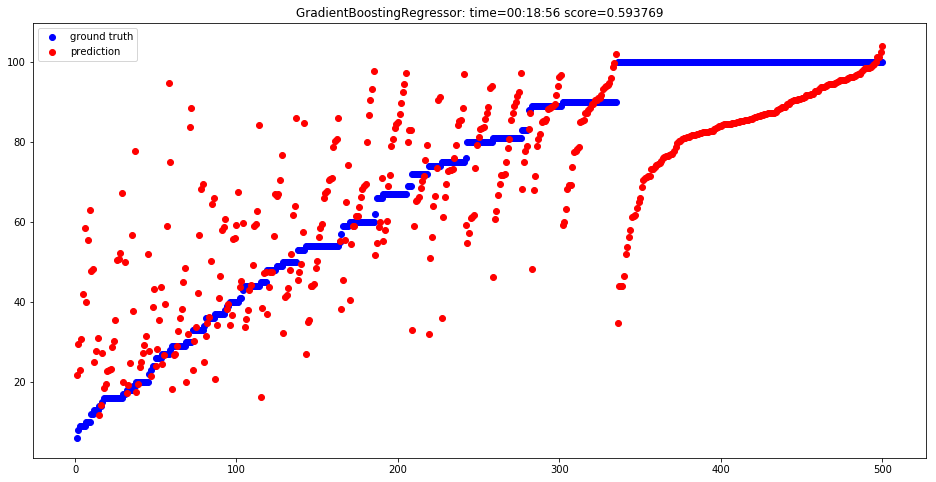

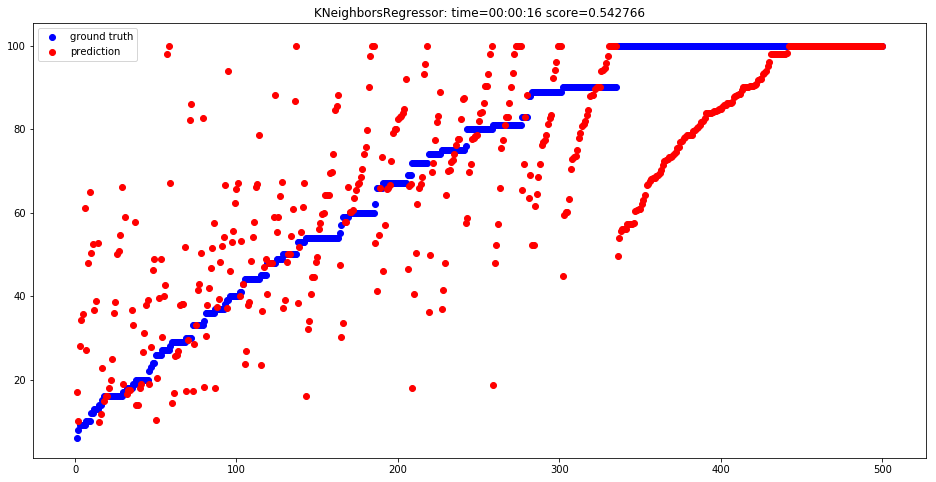

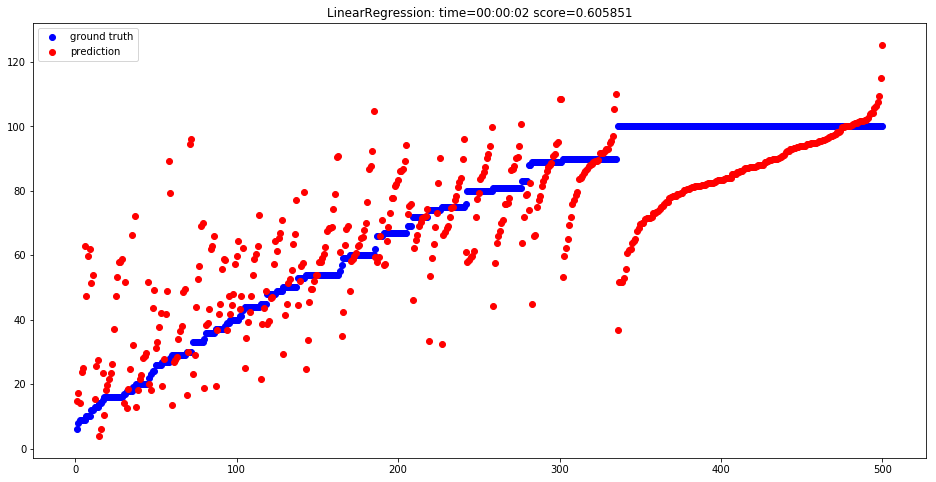

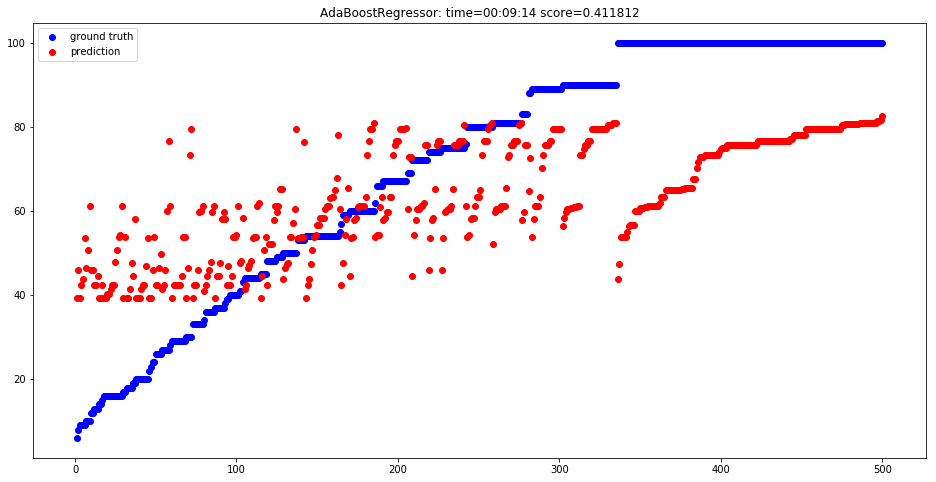

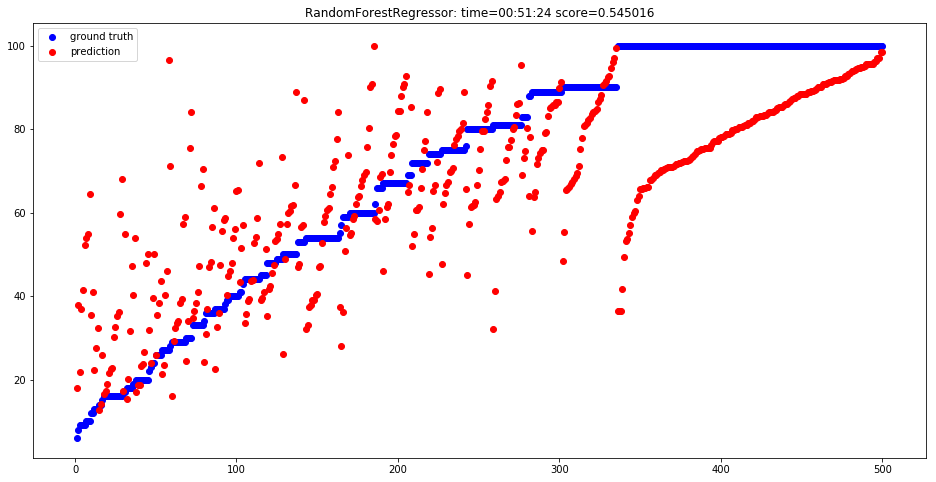

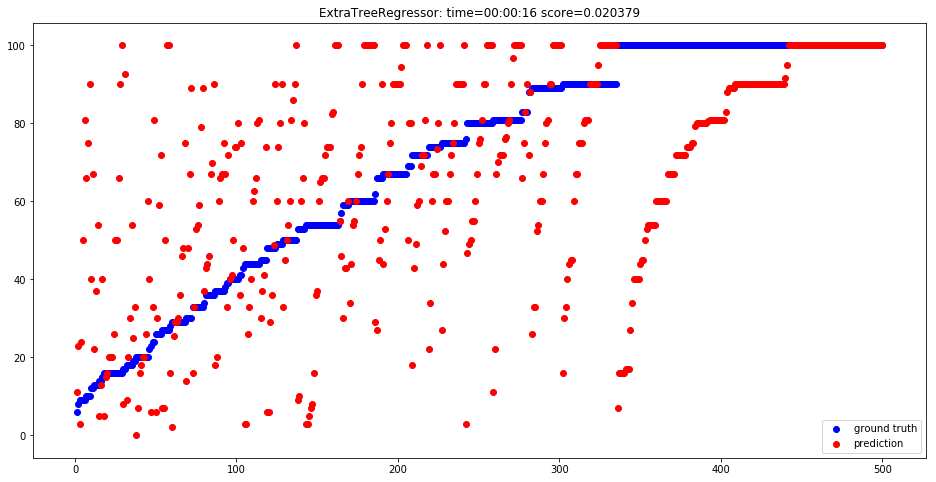

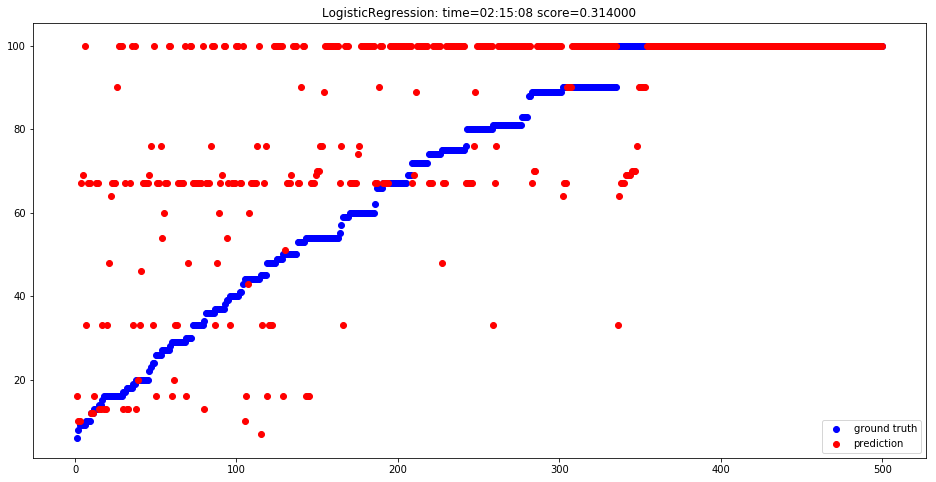

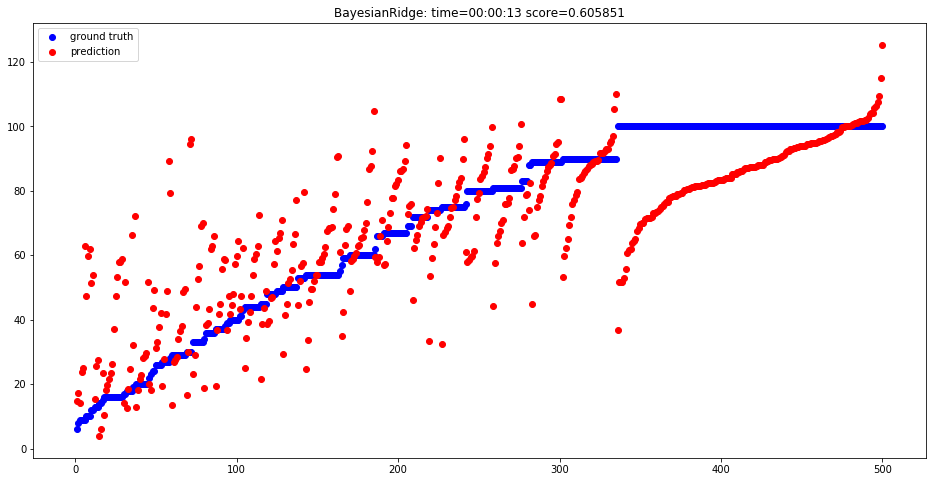

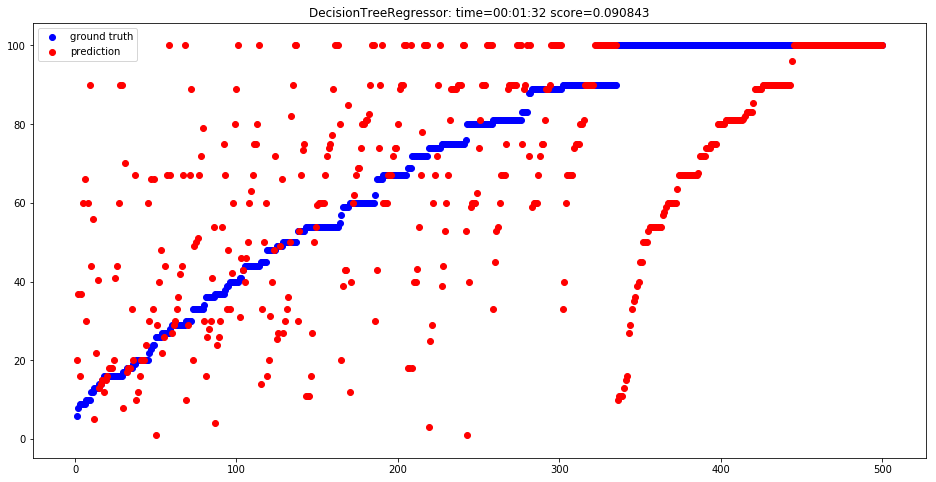

In [7]:
algorithms = {
    'DecisionTreeRegressor':      tree.DecisionTreeRegressor(),
    'ExtraTreeRegressor':         tree.ExtraTreeRegressor(),
    'RandomForestRegressor':      ensemble.RandomForestRegressor(n_estimators=40),
    'AdaBoostRegressor':          ensemble.AdaBoostRegressor(),
    'GradientBoostingRegressor':  ensemble.GradientBoostingRegressor(),
    'KNeighborsRegressor':        neighbors.KNeighborsRegressor(5, weights='distance'),
    'LinearRegression':           linear_model.LinearRegression(),
    'LogisticRegression':         linear_model.LogisticRegression(),
    'BayesianRidge':              linear_model.BayesianRidge(),
}                                  

for algo_name in algorithms:
    tstart = time.time()
    algorithm = algorithms[algo_name]
    model = algorithm.fit(x_train, y_train)
    y_predicted = model.predict(x_test)                                                                                                              
    tend = time.time()

    tsec = tend - tstart
    tmin = tsec // 60
    tsec = tsec %  60
    thrs = tmin // 60
    tmin = tmin %  60
    tuse = 'time=%02d:%02d:%02d' % (thrs, tmin, tsec)

    score = model.score(x_test, y_test)
    score = 'score={0:f}'.format(score)

    # sort to make plot look not so fuzzy
    # intact y_test & y_predicted for next algorithm !!!
    p_test, p_predicted = zip(*sorted(zip(y_test, y_predicted)))

    fig, ax = plt.subplots()
    fig.set_size_inches(16, 8)
    plt.scatter(numpy.arange(1, x_test.shape[0]+1, 1), p_test,      c='b', label='ground truth') 
    plt.scatter(numpy.arange(1, x_test.shape[0]+1, 1), p_predicted, c='r', label='prediction')                                                                                                  
    plt.axis('tight')                                                                                                                           
    plt.legend()                                                                                                                                
    plt.title("%s: %s %s" % (algo_name, tuse, score))                                                                                                                                      
    plt.show()                                                                                                                                      
    plt.savefig("/data/tmp/%s.png" % algo_name) 